## Means Testing

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as statseqwebhdfjn 
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

# Comparing Means


_______________________________________________________________________

|Goal|$H_{0}$|Data Needed|Parametric Test|Assumptions*||  
|---|---|---|---|---|---|  
|Compare observed mean to theoretical one|$\mu_{obs} = \mu_{th}$|array-like of observed values & float of theoretical|One sample t-test: scipy.stats.ttest_1samp|Normally Distributed\*\*||   
|Compare two observed means (independent samples)|$\mu_{a} = \mu_{b}$|2 array-like samples|Independent t-test (or 2-sample): scipy.stats.ttest_ind|Independent, Normally Distributed\*\*, Equal Variances\*\*\*||   
|Compare several observed means (independent samples)|$\mu_{a} = \mu_{b} = \mu_{n}$|n array-like samples|ANOVA: scipy.stats.f_oneway|Independent, Normally Distributed\*\*, Equal Variances**||   

\*If assumptions can't be met, the equivalent non-parametric test can be used.  
\*\*Normal Distribution assumption can be be met by having a large enough sample (due to Central Limit Theorem), or the data can be scaled using a Gaussian Scalar.   
\*\*\*The argument in the stats.ttest_ind() method of `equal_var` can be set to `False` to accomodate this assumption.   

## One Sample T-Test

Goal: Compare observed mean to theoretical one. 

1. Plot Distributions (i.e. Histograms!)  

2. Establish Hypotheses   

||||  
|-----|-----|---------|  
|Null Hypothesis|$H_{0}$|$\mu_{obs} = \mu_{th}$|  
|Alternative Hypothesis (2-tail, significantly different)|$H_{a}$|$\mu_{obs} != \mu_{th}$|  
|Alternative Hypothesis (1-tail, significantly smaller)|$H_{a}$|$\mu_{obs} < \mu_{th}$|  
|Alternative Hypothesis (1-tail, significantly larger)|$H_{a}$|$\mu_{obs} > \mu_{th}$|      

3. Set Significance Level: $\alpha = .05$

4. Verify Assumptions: Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  

5. Compute test statistic and probability (t-statistic & p-value) using `scipy.stats.ttest_1samp`. 

6. Decide. **For a 2-tailed test, we take the p-value as is. For a 1-tailed test, we evaluate $p/2 < \alpha$ and $t > 0$ (to test if higher), and of a less-than test when $p/2 < \alpha$ and $t < 0$.**

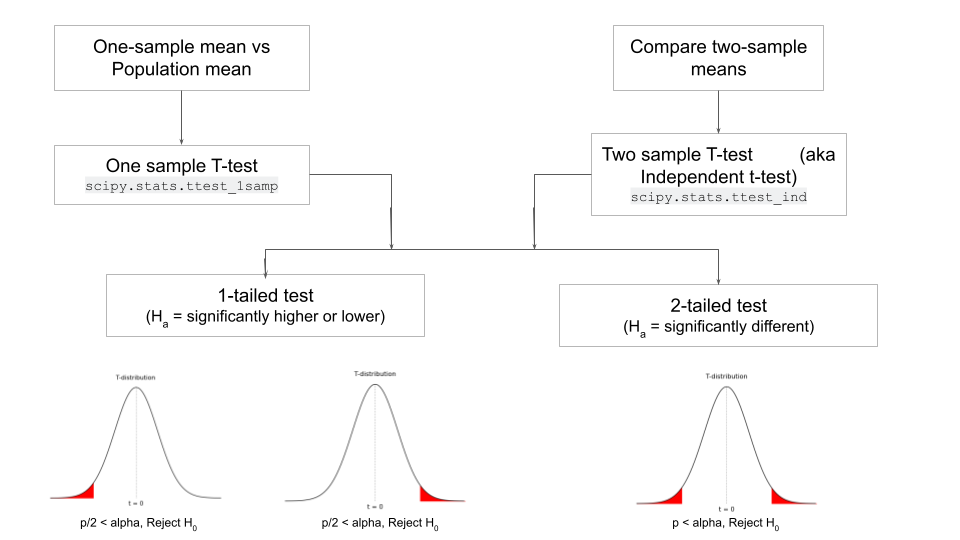

- t-statistic == 0 means no difference is means (i.e null hypothesis is true)
- Only when t-statistic is larger enough (positive or negative) we are confident that means are different enough to reject null

### Let's pull in mpg, a data set that we are somewhat familiar with

In [2]:
mpg = data('mpg')

In [4]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Let's look at the distributions of a couple features present in our data: city mileage and highway mileage

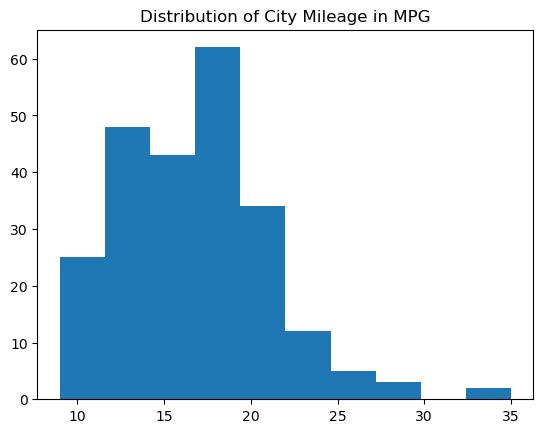

In [5]:
plt.hist(mpg['cty'])
plt.title('Distribution of City Mileage in MPG')
plt.show()

In [6]:
# shape tells us we have 234 rows of info, more than our bare minimum
#for relying on CLT for presumed normality
mpg.shape

(234, 11)

In [8]:
mpg.trans.unique()

array(['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)',
       'auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'],
      dtype=object)

In [12]:
# let's slice up the city mileage up between 
# automatic and manual transmissions
mpg.loc[:,'is_auto'] = np.where(mpg.trans.str.startswith('au'), 'auto', 'manual')

In [14]:
mpg.is_auto.unique()

array(['auto', 'manual'], dtype=object)

In [ ]:
# create a new column for automatic vehicles


 - Making a one-sample t-test

A one-sample t-test will examine the mean of a group from within our sample to the greater population distribution (all cars)

### Establish our Hypothesis Test:
 - H$_0$ The means of our automatic cars city mileage is equivalent to the mean of all of the cars in our data set (they come from the same distributions)
 - H$_a$ The means of our automatic cars city mileage and general car population's city mileage are different (they come from different distributions)

In [ ]:
# to run a one-sample t test, we also need the mean of our population.
# to get our best approximation of the population mean, lets 
# take the mean of all cty mileage

In [16]:
μ_th = mpg.cty.mean()
μ_th

16.858974358974358

In [17]:
auto_car = mpg[mpg['is_auto'] == 'auto'].cty

In [18]:
auto_car[:10]

1     18
4     21
5     16
7     18
9     16
11    19
12    15
14    17
16    15
17    17
Name: cty, dtype: int64

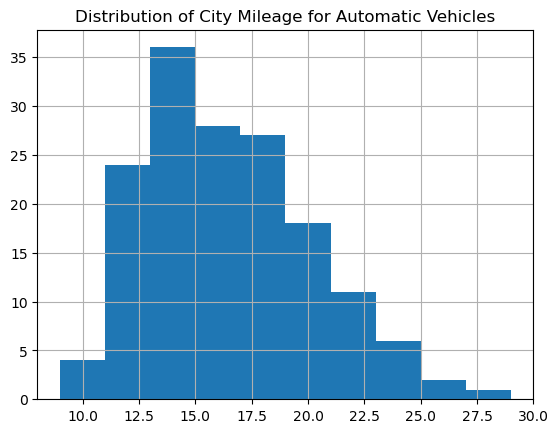

In [19]:
auto_car.hist()
plt.title('Distribution of City Mileage for Automatic Vehicles')
plt.show()

In [21]:
#extra stuff we need to run a test here beyond the null/alt hypothesis:
#set a confidence level of 95% so an α of 0.05
α = 0.05
# we will run a test that will output a t statistic as well as a p value. If our p value is less than 0.05, we 
# will reject the null hypothesis and posit difference in the means of automatic cars vs all cars city mileage
r, p = stats.ttest_1samp(auto_car, μ_th)

In [22]:
if p < α:
    print('we reject the null and say there is a difference in the means')
else:
    print('fail to reject null hypothesis')

we reject the null and say there is a difference in the means


In [ ]:
# what if we wanted to say that this is a one tail test?
# new hypothesis time!
# H0: the mean city mileage of automatic carsis equal to OR HIGHER than the city mileage of all cars
# Ha: the mean city mileage of automatic cars is LOWER than the mean of city mileage for all cars

In [23]:
#one-sample: subgroup vs population
#one-tailed: directional difference (Ha posits *lower* than)
stats.ttest_1samp(auto_car, μ_th) 

TtestResult(statistic=-2.9001322447463838, pvalue=0.004268839797630686, df=156)

In [24]:
if (r < 0) and (p/2 < α):
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


In [ ]:
# # Refresher:
# -One sample: auto group vs all samples
# -Two tailed: statement in alt hypothesis of difference (nondirectional)

### Two-sample t-tests:

parameters for a t-test:
 - The samples have a normal* distribution
 - The samples have equal variance
 - The samples have independence from eachother

<Axes: >

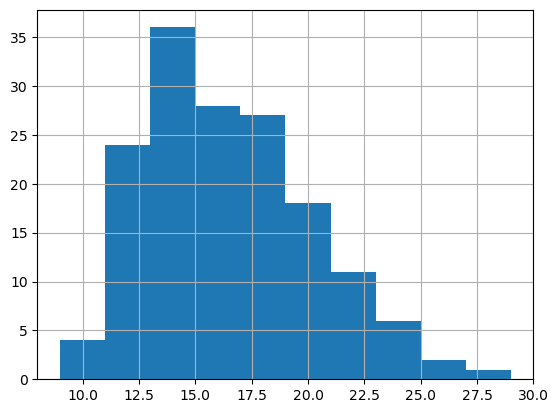

In [25]:
auto_car.hist()

In [26]:
manual_car = mpg[mpg.is_auto == 'manual'].cty

In [28]:
manual_car[:3]

2    21
3    20
6    18
Name: cty, dtype: int64

 - H$_0$ 
 - H$_a$ 

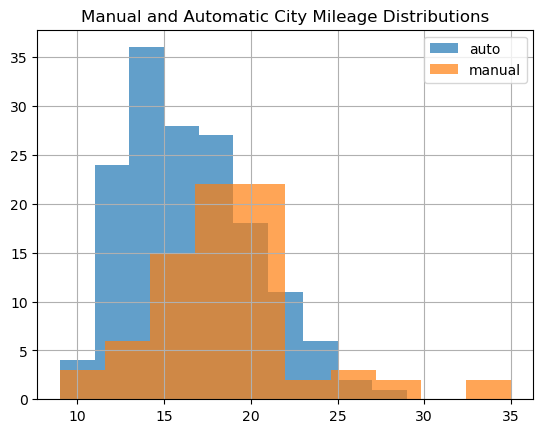

In [29]:
auto_car.hist(alpha=0.7, label='auto')
manual_car.hist(alpha=0.7, label='manual')
plt.legend()
plt.title('Manual and Automatic City Mileage Distributions')
plt.show()

In [ ]:
auto_car.hist() 
manual_car.hist()
plt.show()

- H$_0$ There is equivalence in the mean city mileage of automatic cars compared to manual cars
- H$_a$ There is a difference in mean city mileage of automatic vehicles compared to manual vehicles

In [ ]:
#two tailed: == vs !=
#two sample: subgroup vs subgroup (auto vs manual)

In [ ]:
#parameters for a conventional parametric test:
# in this case, an independent t-test:

1. Are the samples normal?
2. Are the samples of equal variance?
3. Are the samples indepedent? (yes, no cars that are both manual and automatic)

In [30]:
#if we want to say #1 with confidence, we can use:
#stats.shapiro
#or:
print(manual_car.shape)
print(auto_car.shape)


(77,)
(157,)


In [ ]:
for parameter question 1, we will rely on the idea that the current sample
look mostly normal and we have over 30 samples,
suggesting that if we had even more, the distributions would approach normality
for parameter question 2, I'm less confident because these distributions seem like they might be defined by different 
standard deviations

In [31]:
#let's actually do a test for the that one:
#levene test: 
# H0: there is equal variance in our two samples
# Ha: there is an inequality of variance in our two samples
stats.levene(auto_car, manual_car)

LeveneResult(statistic=0.2268497395104212, pvalue=0.6343178392034001)

In [32]:
t, p = stats.levene(auto_car, manual_car)

In [33]:
if p < α:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')


we fail to reject the null hypothesis


In [35]:
# this gives us enough fuel to do our tests
# we fail to reject the null, so we presume equal variance so we do normal parametric test
t, p= stats.ttest_ind(auto_car, manual_car)

In [36]:
if p < α:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


 - Following from this, what if I did want to say that one was more than the other?

### One-tailed testing!

 - H$_0$ (>=)the city mileage of automatic cars is greater than or equal to the city mileage of manual cars
 - H$_a$ (<)The city mileage of automatic cars is on average lower than the city mileage of manual cars

In [37]:
#for a two sample, one tailed test:
#two sample two independent subgroups
# one tailed: directional posit of difference in Ha
#parameters: all the same checks as we just did are still valid
t, p = stats.ttest_ind(auto_car, manual_car)
if (t < 0) and ((p/2) <α):
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


In [39]:
stats.ttest_ind(auto_car, manual_car, alternative= 'greater')

TtestResult(statistic=-4.781718413818975, pvalue=0.999998455513243, df=232.0)

In [44]:
# if we want to run a shapir test for normality rather than depending on CLT and a number of samples
t, p_auto = stats.shapiro(auto_car)

In [43]:
t, p_manual = stats.shapiro(manual_car)

- $H_0$ -the distributions are normal
- $H_a$ -the distributions are not normally distributed

In [47]:
p_auto < α

True

### Anova testing:

In [ ]:
# anova for cyls cty mileage:
# group 1: 4 cyl
# group 2: 5 cyl
# group 3: 6 cyl
# group 4: 8 cyl

In [49]:
four_cyl = mpg[mpg.cyl == 4].cty
five_cyl = mpg[mpg.cyl == 5].cty
six_cyl = mpg[mpg.cyl == 6].cty
eight_cyl = mpg[mpg.cyl == 8].cty

In [50]:
f_stat, p = stats.f_oneway(four_cyl, five_cyl, six_cyl, eight_cyl)

In [51]:
p < α

True

In [ ]:
# Cool, Ive suggested because p is less than alpha
# that there are diffences in distribution between
# the city mileage of these different groups.

# This often has less utility to me as someone
# making exploratory investigations about my data,
# because while there are differences in the mileage of these
# groups, I am still going to want to ask
# further questions about the outcome specific to any 
# given subpopulation

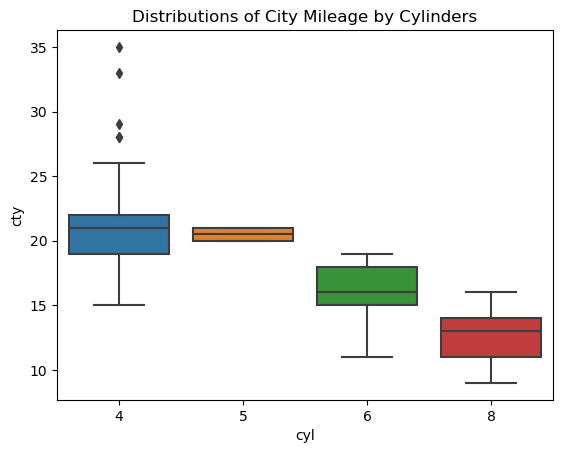

In [52]:
sns.boxplot(data=mpg,
            x='cyl',
            y='cty')
plt.title('Distributions of City Mileage by Cylinders')
plt.show()

In [ ]:
# we can get a significant amount of information
# from looking at the box plots of the cyls
# as they sit on the cty mileage line
# -- we likely want to drill down with two-sample tests
# It appears that 4 cyls have a higher city mileage

In [53]:
stats.ttest_ind_from_stats?

Signature:
stats.ttest_ind_from_stats(
    mean1,
    std1,
    nobs1,
    mean2,
    std2,
    nobs2,
    equal_var=True,
    alternative='two-sided',
)
Docstring:
T-test for means of two independent samples from descriptive statistics.

This is a test for the null hypothesis that two independent
samples have identical average (expected) values.

Parameters
----------
mean1 : array_like
    The mean(s) of sample 1.
std1 : array_like
    The corrected sample standard deviation of sample 1 (i.e. ``ddof=1``).
nobs1 : array_like
    The number(s) of observations of sample 1.
mean2 : array_like
    The mean(s) of sample 2.
std2 : array_like
    The corrected sample standard deviation of sample 2 (i.e. ``ddof=1``).
nobs2 : array_like
    The number(s) of observations of sample 2.
equal_var : bool, optional
    If True (default), perform a standard independent 2 sample test
    that assumes equal population variances [1]_.
    If False, perform Welch's t-test, which does not assume equal
   